In [40]:
#Step 0. 필요한 모듈과 라이브러리를 로딩합니다.
import sys # 시스템
import os  # 시스템

import pandas as pd  # 판다스 : 데이터분석 라이브러리
import numpy as np   # 넘파이 : 숫자, 행렬 데이터 라이브러리

import chromedriver_autoinstaller
import selenium
from selenium.webdriver.common.by import By
from selenium import webdriver   # 웹 브라우저 자동화
import time    # 서버와 통신할 때 중간중간 시간 지연. 보통은 1초
from tqdm import tqdm   # for문 돌릴 때 진행상황을 %게이지로 알려준다.

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

In [58]:
# 직접 수집하기

chromedriver_autoinstaller.install(cwd=True)
driver = webdriver.Chrome()   
driver.get('https://brand.naver.com/labnoshmall/products/4652612759?nl-query=%EB%9E%A9%EB%85%B8%EC%89%AC&nl-au=a3fa34b3bead42dc8f70e0869eb15bd7&NaPm=ci%3Da3fa34b3bead42dc8f70e0869eb15bd7%7Cct%3Dmleijju9%7Ctr%3Dnslsl%7Csn%3D797523%7Chk%3Dcac44323c0310d6550faff07a3fe61d443eb8bce')
time.sleep(2)    # 2초간 정지

In [59]:
# 현재 페이지를 스크롤 다운하는 자바스크립트 코드
driver.execute_script("window.scrollTo(0, 99999999)")
time.sleep(1)

In [60]:
# "리뷰" 클릭
selector = ".eU7rNhgfLA"
driver.find_element(By.CSS_SELECTOR, selector).click()
time.sleep(1)

In [61]:
driver.find_element(By.LINK_TEXT, '최신순').click()
time.sleep(1)

In [62]:
# 첫번째 리뷰
selector ='.O2M37e85_1'
driver.find_element(By.CSS_SELECTOR, selector).text

'평점\n5\njble***\n26.02.08.\n신고\n1. 맛 선택 (6개입): 쿠키앤크림 (6개입) / 2. 맛 선택 (6개입): 스트로베리 (6개입)\n유통기한꽤 남았어요포장적당해요편리편리해요\n한달사용평소에 아주 잘 마시고 있습니다.'

In [63]:
# 해당 페이지 전체 리뷰
selector = '.b_caIle8kC' 
title_top = driver.find_elements(By.CSS_SELECTOR, selector)
# len(title_top)
title_list = []

for a in title_top:
    title = a.text
    title_list.append(title)
    # print(title)

print(len(title_list))
title_list

20


['1. 맛 선택 (6개입): 쿠키앤크림 (6개입) / 2. 맛 선택 (6개입): 스트로베리 (6개입)\n유통기한꽤 남았어요포장적당해요편리편리해요',
 '1. 맛 선택 (6개입): 쿠키앤크림 (6개입) / 2. 맛 선택 (6개입): 쿠키앤크림 (6개입)\n유통기한아주 넉넉해요포장꼼꼼해요편리편리해요',
 '1. 맛 선택 (6개입): 스트로베리 (6개입) / 2. 맛 선택 (6개입): 바나나 (6개입)\n유통기한아주 넉넉해요포장꼼꼼해요편리편리해요',
 '1. 맛 선택 (6개입): 메론 (6개입) / 2. 맛 선택 (6개입): 스트로베리 (6개입)\n유통기한아주 넉넉해요포장꼼꼼해요편리편리해요',
 '1. 맛 선택 (6개입): 카카오 (6개입) / 2. 맛 선택 (6개입): 스트로베리 (6개입)\n유통기한아주 넉넉해요포장꼼꼼해요편리편리해요',
 '1. 맛 선택 (6개입): 카카오 (6개입) / 2. 맛 선택 (6개입): 쿠키앤크림 (6개입)\n유통기한아주 넉넉해요포장꼼꼼해요편리편리해요',
 '1. 맛 선택 (6개입): 카카오 (6개입) / 2. 맛 선택 (6개입): 카카오 (6개입)\n유통기한아주 넉넉해요포장꼼꼼해요편리편리해요',
 '1. 맛 선택 (6개입): 라떼 (6개입) / 2. 맛 선택 (6개입): 라떼 (6개입)\n유통기한아주 넉넉해요포장꼼꼼해요편리편리해요',
 '1. 맛 선택 (6개입): 메론 (6개입) / 2. 맛 선택 (6개입): 쿠키앤크림 (6개입)\n유통기한아주 넉넉해요포장꼼꼼해요편리편리해요',
 '1. 맛 선택 (6개입): 카카오 (6개입) / 2. 맛 선택 (6개입): 카카오 (6개입)\n유통기한아주 넉넉해요포장꼼꼼해요편리편리해요',
 '1. 맛 선택 (6개입): 카카오 (6개입) / 2. 맛 선택 (6개입): 쿠키앤크림 (6개입)\n유통기한아주 넉넉해요포장꼼꼼해요편리편리해요',
 '1. 맛 선택 (6개입): 카카오 (6개입) / 2. 맛 선택 (6개입): 라떼 (6개입)\n유통기한아주 넉넉해요포장꼼꼼해요편리편리해요',
 '1. 맛 선택 (6개입

In [64]:
### 다음 페이지로 이동

# 원하는 페이지 이동하는 selector
page_num = 2
driver.find_element(By.CSS_SELECTOR,
    f'a[data-shp-contents-id="{page_num}"]'
).click()

selector = '.b_caIle8kC'
title_top = driver.find_elements(By.CSS_SELECTOR, selector)
len(title_top)

# 새 페이지에서 리뷰 새로 수집해서
# 이전에 만들어둔 title_list에 저장하기
for a in title_top:
    title = a.text
    title_list.append(title)
    # print(title)

print(len(title_list))
title_list

page_num = 3
driver.find_element(By.CSS_SELECTOR,
    f'a[data-shp-contents-id="{page_num}"]'
).click()

selector = '.b_caIle8kC'
title_top = driver.find_elements(By.CSS_SELECTOR, selector)
len(title_top)

# 새 페이지에서 리뷰 새로 수집해서
# 이전에 만들어둔 title_list에 저장하기
for a in title_top:
    title = a.text
    title_list.append(title)
    # print(title)

print(len(title_list))
title_list



page_num = 4
driver.find_element(By.CSS_SELECTOR,
    f'a[data-shp-contents-id="{page_num}"]'
).click()

selector = '.b_caIle8kC'
title_top = driver.find_elements(By.CSS_SELECTOR, selector)
len(title_top)

# 새 페이지에서 리뷰 새로 수집해서
# 이전에 만들어둔 title_list에 저장하기
for a in title_top:
    title = a.text
    title_list.append(title)
    # print(title)

print(len(title_list))
title_list

40
60
80


['1. 맛 선택 (6개입): 쿠키앤크림 (6개입) / 2. 맛 선택 (6개입): 스트로베리 (6개입)\n유통기한꽤 남았어요포장적당해요편리편리해요',
 '1. 맛 선택 (6개입): 쿠키앤크림 (6개입) / 2. 맛 선택 (6개입): 쿠키앤크림 (6개입)\n유통기한아주 넉넉해요포장꼼꼼해요편리편리해요',
 '1. 맛 선택 (6개입): 스트로베리 (6개입) / 2. 맛 선택 (6개입): 바나나 (6개입)\n유통기한아주 넉넉해요포장꼼꼼해요편리편리해요',
 '1. 맛 선택 (6개입): 메론 (6개입) / 2. 맛 선택 (6개입): 스트로베리 (6개입)\n유통기한아주 넉넉해요포장꼼꼼해요편리편리해요',
 '1. 맛 선택 (6개입): 카카오 (6개입) / 2. 맛 선택 (6개입): 스트로베리 (6개입)\n유통기한아주 넉넉해요포장꼼꼼해요편리편리해요',
 '1. 맛 선택 (6개입): 카카오 (6개입) / 2. 맛 선택 (6개입): 쿠키앤크림 (6개입)\n유통기한아주 넉넉해요포장꼼꼼해요편리편리해요',
 '1. 맛 선택 (6개입): 카카오 (6개입) / 2. 맛 선택 (6개입): 카카오 (6개입)\n유통기한아주 넉넉해요포장꼼꼼해요편리편리해요',
 '1. 맛 선택 (6개입): 라떼 (6개입) / 2. 맛 선택 (6개입): 라떼 (6개입)\n유통기한아주 넉넉해요포장꼼꼼해요편리편리해요',
 '1. 맛 선택 (6개입): 메론 (6개입) / 2. 맛 선택 (6개입): 쿠키앤크림 (6개입)\n유통기한아주 넉넉해요포장꼼꼼해요편리편리해요',
 '1. 맛 선택 (6개입): 카카오 (6개입) / 2. 맛 선택 (6개입): 카카오 (6개입)\n유통기한아주 넉넉해요포장꼼꼼해요편리편리해요',
 '1. 맛 선택 (6개입): 카카오 (6개입) / 2. 맛 선택 (6개입): 쿠키앤크림 (6개입)\n유통기한아주 넉넉해요포장꼼꼼해요편리편리해요',
 '1. 맛 선택 (6개입): 카카오 (6개입) / 2. 맛 선택 (6개입): 라떼 (6개입)\n유통기한아주 넉넉해요포장꼼꼼해요편리편리해요',
 '1. 맛 선택 (6개입

In [ ]:
#변수 = pd.DataFrame
#({'이름': 저장변수, '이름': 저장변수})

In [ ]:
#최종만든변수.to_csv("저장명.csv",encoding="cp949")  
#encoding='utf-8-sig'

In [9]:
from konlpy.tag import Okt

In [10]:
okt = Okt()
print(okt.morphs

_IncompleteInputError: incomplete input (2996379649.py, line 2)

In [11]:
import pandas as pd
import numpy as np

In [12]:
%pwd

'C:\\Users\\Administrator\\OneDrive\\Desktop\\python_jupyter notebook\\crawl\\selenium'

In [13]:
import os
os.getcwd()

#바탕화면에 있는 엑셀 불러오기 r 필수임 
df = pd.read_excel(
    r"C:\Users\Administrator\OneDrive\Desktop\reviewcontents.xlsx"
)
df

,구매id,리뷰날짜,구매옵션,리뷰내용,리뷰점수,수량
0,rhen****,2026-01-27T13:17:52.822+00:00,1. 맛 선택 (6개입): 스트로베리 (6개입) / 2. 맛 선택 (6개입): 바나...,맛도 있고 먹기 편해서 아주 좋습니다! 회사\n출근 전 들고 가서 먹기 편해요,5,1
1,jung******,2026-02-05T07:33:13.368+00:00,1. 맛 선택 (6개입): 메론 (6개입) / 2. 맛 선택 (6개입): 쿠키앤크림...,아이가 좋아해서 쟁여놓습니다.\n운동끝나고 매일 한개씩\n메론맛 강추!!\n다른 브...,5,1
2,skys****,2026-01-23T11:08:59.343+00:00,1. 맛 선택 (6개입): 카카오 (6개입) / 2. 맛 선택 (6개입): 라떼 (...,빠른 배송과 단백질 음료중 제일 함량도 높고 맛도 좋아요,5,1
3,wlrh****,2026-02-03T14:43:03.800+00:00,1. 맛 선택 (6개입): 카카오 (6개입) / 2. 맛 선택 (6개입): 바나나 ...,헬스하고 하나씩 먹고있어요 프로틴드링크 너무 편리해요,5,1
4,xjfl****,2026-01-19T08:48:27.441+00:00,1. 맛 선택 (6개입): 쿠키앤크림 (6개입) / 2. 맛 선택 (6개입): 메론...,배송 금방오구요. 부피는 훨씬크고 무겁지만 물넣어서 탈 필요도 없는 점은 편합니다....,5,1
...,...,...,...,...,...,...
5078,xkwh***,2020-01-12T02:13:49.000+00:00,NaN,저렴하게 잘삿어요~,5,1
5079,issu***,2019-10-27T00:56:19.000+00:00,NaN,"지방이 없고, 식이섬유/단백질 많이 들어가 있어서 좋아요!! 게다가 맛있기까지...ㅠㅠ",5,1
5080,jiny******,2019-09-08T04:22:55.000+00:00,NaN,배달도 엄청 빠르고 꼼꼼하게 포장되어서 왔어요. \n맛도 기대이상으로 맛있어요. \...,4,1
5081,ansa*******,2019-09-10T03:58:21.000+00:00,NaN,기존 제품보다 편리하고 맛있어요~,5,1


In [15]:
review_list_a = (df["리뷰내용"].dropna().str.replace("\n", " ", regex=False).str.strip().tolist())
review_list_a

['맛도 있고 먹기 편해서 아주 좋습니다! 회사 출근 전 들고 가서 먹기 편해요',
 '아이가 좋아해서 쟁여놓습니다. 운동끝나고 매일 한개씩 메론맛 강추!! 다른 브랜드 제품들보다 훨씬 맛있어요!',
 '빠른 배송과 단백질 음료중 제일 함량도 높고 맛도 좋아요',
 '헬스하고 하나씩 먹고있어요 프로틴드링크 너무 편리해요',
 '배송 금방오구요. 부피는 훨씬크고 무겁지만 물넣어서 탈 필요도 없는 점은 편합니다. 사무실에서 점심대용으로 먹을 예정이에요.  쿠키앤크림 맛있음!',
 '너무 좋아요 감사합니다ㅎ',
 '너무 좋아요 감사합니다ㅎㅎ',
 '너무 좋아요 감사합니다ㅎㅎ',
 '늘 먹던 음료라 좋아요',
 '아이들이 좋아하고 맛있게 먹네요',
 '간편하게 마시기 좋아요',
 '매일 마시기 좋아요',
 '애들이 아주 좋아하고 잘 먹네요',
 '나름 먹을만 한거 같아요',
 '나름 먹을만 한거 같아요',
 '양이 많아서 식사대용으로도 좋아요. 쉐이크 들고 다니면 우유나 물 타먹기 귀찮았는데 얘는 그냥 마셔도 되니 좋아요',
 '탄수화물이 소량 들어있어서 식사대용으로 좋아요 프로틴함량도 27그램이라 든든합니다',
 '싸게 나오면 항상 구입해요',
 '매번 잘 마시는 제품이에요',
 '딸기맛은 처음인데 맛있네요 재구매의향 있습니다.',
 '운동 끝나고 먹으면 배도 안고프고 좋아요',
 '맛있게 잘 먹고있습니다. 다먹고 다음에 또 주문할게요',
 '맛도 좋고 꾸준히 먹으면 좋을거 같네요',
 '빠른 배송 굿, 맛도 좆네요',
 '메론맛 상큼하고 맛있어요. 포만감도 생기고 든든해요',
 '질리지 않아서 좋아요 요즘 아이랑 저랑 계속 먹고 있는데 맛있고 든든합니다.계속사도 사도 줄어드는게..흠.. 조만간 또 사야 할듯 하네요 아이 기숙사에도 보내야 해서 대량 구매 해야 겠어요',
 '맛도 좋고 꾸준히 먹으면 좋겠어요',
 '단백질 음료중에 초코맛이 젤 잘나요',
 '먹기 너무 편리해요 단백질 암냠얌',
 '편의점에서만 몆개집어서 항상 사먹었는데 네이버스토어도 있길래 똑같은걸

In [16]:
total_str = " ".join(review_list_a)

데이터 개수: 5083개
통합 문자열 길이: 158101자
----- 빈출 단어 TOP 10 -----
다이어트: 89회
초코우유: 78회
아침식사: 29회
영양성분: 21회
식이섬유: 21회
커피우유: 20회
스트로베리: 17회
여러가지: 13회
남자친구: 13회
오프라인: 10회


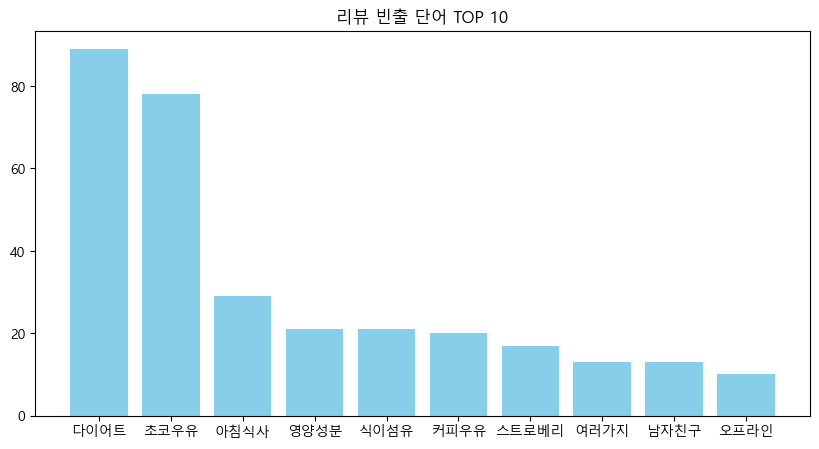

In [17]:
total_str = " ".join(review_list_a)

# 결과 확인
print(f"데이터 개수: {len(review_list_a)}개")
print(f"통합 문자열 길이: {len(total_str)}자")

from konlpy.tag import Okt
from collections import Counter

# 형태소 분석기 초기화
okt = Okt()

# 1. 명사 추출 및 2,4 등등 글자 이상인 단어만 필터링
nouns = okt.nouns(total_str)
words = [n for n in nouns if len(n) >= 4]

# 2. 단어 빈도 계산
count = Counter(words)
top_10 = count.most_common(10)

print("----- 빈출 단어 TOP 10 -----")
for word, freq in top_10:
    print(f"{word}: {freq}회")

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 한글 폰트 설정 (환경에 따라 경로 수정이 필요할 수 있습니다)
plt.rcParams['font.family'] = 'Malgun Gothic' # 윈도우 기준

# 2. 빈출 단어 시각화 (막대 그래프)
words_only = [x[0] for x in top_10]
counts_only = [x[1] for x in top_10]

plt.figure(figsize=(10, 5))
plt.bar(words_only, counts_only, color='skyblue')
plt.title('리뷰 빈출 단어 TOP 10')
plt.show()

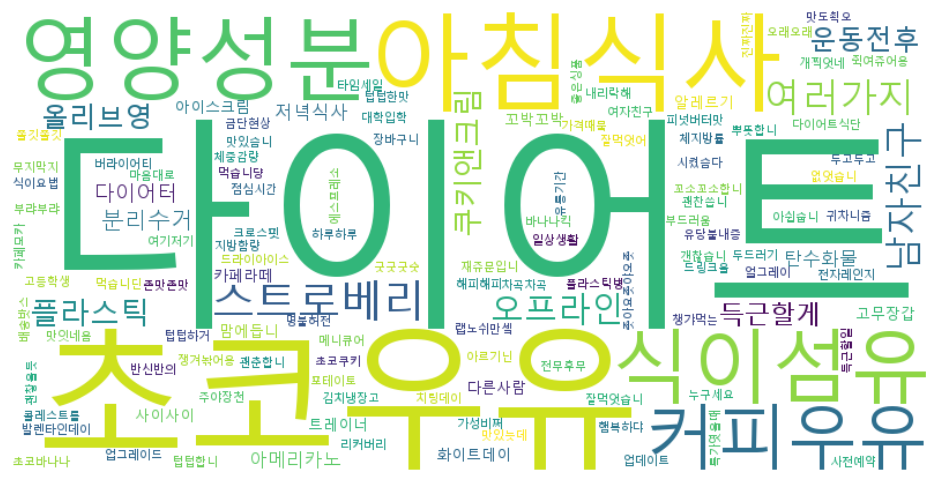

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

In [18]:
# 3. 워드 클라우드 생성
wc = WordCloud(
    font_path='malgun', # 윈도우 폰트 이름
    background_color='white',
    width=800,
    height=400
).generate_from_frequencies(count)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

import matplotlib.pyplot as plt

# top 10 단어와 빈도
words_only = [x[0] for x in top_10]
counts_only = [x[1] for x in top_10]

plt.figure(figsize=(8, 8))

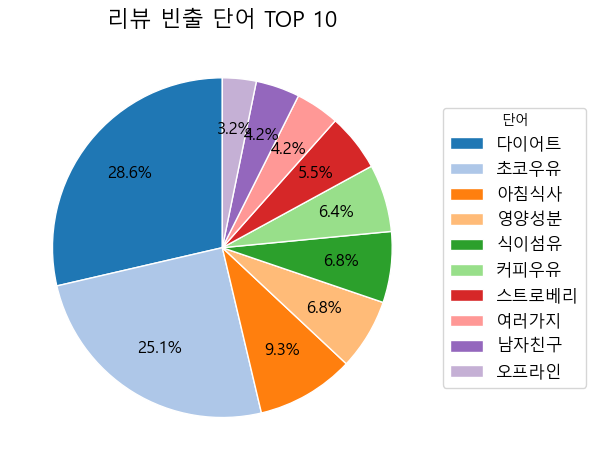

In [24]:

# 원형 그래프
plt.pie(
    counts_only,
    labels=None,               # 라벨은 제외
    autopct='%1.1f%%',         # 퍼센트 표시
    startangle=90,
    colors=plt.cm.tab20.colors,
    wedgeprops={'edgecolor':'white', 'linewidth':1},
    textprops={'fontsize':12},
    pctdistance=0.7             # 퍼센트를 원 안쪽 적절한 위치
)

# 범례로 단어 표시
plt.legend(
    words_only, 
    title="단어", 
    loc="center left", 
    bbox_to_anchor=(1, 0, 0.5, 1), 
    fontsize=12
)
plt.title('리뷰 빈출 단어 TOP 10', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
인사이트 도출
다이어트 관련 제품 관심↑ → 다이어트 기능 강조 제품 인기
초코우유 & 아침식사 관련 언급↑ → 아침 대용/건강 음료 니즈
영양성분 & 식이섬유 언급 → 건강, 기능성 강조가 구매 포인트
남자친구, 오프라인 → 헬스하는 남친 선물용 
매출 증대 전략 예시
제품 & 마케팅 메시지
“다이어트 초코우유, 아침 대용으로 딱!”
영양성분, 식이섬유 강조
리뷰에서 자주 언급된 키워드 활용
프로모션 & 번들 전략
아침식사 세트 구성 (초코우유+식이섬유 제품)
남자친구 선물용 패키지 구성
콘텐츠 마케팅
SNS/블로그에 리뷰 기반 콘텐츠 제작
“다이어트하면서 즐기는 초코우유 레시피”

In [25]:
review_list_b = (df["구매옵션"].dropna().str.replace("\n", " ", regex=False).str.strip().tolist())
review_list_b

['1. 맛 선택 (6개입): 스트로베리 (6개입) / 2. 맛 선택 (6개입): 바나나 (6개입)',
 '1. 맛 선택 (6개입): 메론 (6개입) / 2. 맛 선택 (6개입): 쿠키앤크림 (6개입)',
 '1. 맛 선택 (6개입): 카카오 (6개입) / 2. 맛 선택 (6개입): 라떼 (6개입)',
 '1. 맛 선택 (6개입): 카카오 (6개입) / 2. 맛 선택 (6개입): 바나나 (6개입)',
 '1. 맛 선택 (6개입): 쿠키앤크림 (6개입) / 2. 맛 선택 (6개입): 메론 (6개입)',
 '1. 맛 선택 (6개입): 라떼 (6개입) / 2. 맛 선택 (6개입): 라떼 (6개입)',
 '1. 맛 선택 (6개입): 카카오 (6개입) / 2. 맛 선택 (6개입): 라떼 (6개입)',
 '1. 맛 선택 (6개입): 라떼 (6개입) / 2. 맛 선택 (6개입): 카카오 (6개입)',
 '1. 맛 선택 (6개입): 카카오 (6개입) / 2. 맛 선택 (6개입): 카카오 (6개입)',
 '1. 맛 선택 (6개입): 메론 (6개입) / 2. 맛 선택 (6개입): 쿠키앤크림 (6개입)',
 '1. 맛 선택 (6개입): 카카오 (6개입) / 2. 맛 선택 (6개입): 카카오 (6개입)',
 '1. 맛 선택 (6개입): 카카오 (6개입) / 2. 맛 선택 (6개입): 쿠키앤크림 (6개입)',
 '1. 맛 선택 (6개입): 스트로베리 (6개입) / 2. 맛 선택 (6개입): 메론 (6개입)',
 '1. 맛 선택 (6개입): 메론 (6개입) / 2. 맛 선택 (6개입): 카카오 (6개입)',
 '1. 맛 선택 (6개입): 스트로베리 (6개입) / 2. 맛 선택 (6개입): 바나나 (6개입)',
 '1. 맛 선택 (6개입): 카카오 (6개입) / 2. 맛 선택 (6개입): 바나나 (6개입)',
 '1. 맛 선택 (6개입): 쿠키앤크림 (6개입) / 2. 맛 선택 (6개입): 바나나 (6개입)',
 '1. 맛 선택 (6개입): 쿠키앤크림 (6개입) / 2. 맛 선택 (6개

In [27]:
total_str = " ".join(review_list_b)

# 결과 확인
print(f"데이터 개수: {len(review_list_b)}개")
print(f"통합 문자열 길이: {len(total_str)}자")

# 형태소 분석기 초기화
okt = Okt()

# 1. 명사 추출 및 1,2,3,4,n 등등 글자 이상인 단어만 필터링
nouns = okt.nouns(total_str)
words = [n for n in nouns if len(n) >= 2]

# 2. 단어 빈도 계산
count = Counter(words)
top_10 = count.most_common(10)

print("----- 빈출 단어 TOP 10 -----")
for word, freq in top_10:
    print(f"{word}: {freq}회")

top_words = count.most_common()

for word, freq in top_words:
    print(f"{word}: {freq}회")


데이터 개수: 5029개
통합 문자열 길이: 130516자
----- 빈출 단어 TOP 10 -----
선택: 5762회
개입: 5339회
일드: 4240회
카카오: 2668회
스트로베리: 1770회
바나나: 1566회
라떼: 1240회
쿠키앤크림: 374회
메론: 285회
프로: 93회
선택: 5762회
개입: 5339회
일드: 4240회
카카오: 2668회
스트로베리: 1770회
바나나: 1566회
라떼: 1240회
쿠키앤크림: 374회
메론: 285회
프로: 93회
링크: 93회
유통: 16회
기한: 16회
버전: 5회


In [28]:
import pandas as pd
from collections import Counter

In [30]:
# 1. 단어 빈도 Counter (이미 있다면 이 줄은 생략 가능)
count = Counter(words)

# 2. Counter → DataFrame
df_words = pd.DataFrame(
    count.items(),
    columns=["단어", "빈도"]
)

# 3. 빈도 내림차순 정렬
df_words = df_words.sort_values(by="빈도", ascending=False)

df_words

target_words = ["카카오", "스트로베리", "바나나", "라떼", "쿠키앤크림", "메론"]

df_flavor = (
    df_words[df_words["단어"].isin(target_words)]
    .sort_values(by="빈도", ascending=False)
)

df_flavor

,단어,빈도
6,카카오,2668
2,스트로베리,1770
3,바나나,1566
7,라떼,1240
5,쿠키앤크림,374
4,메론,285


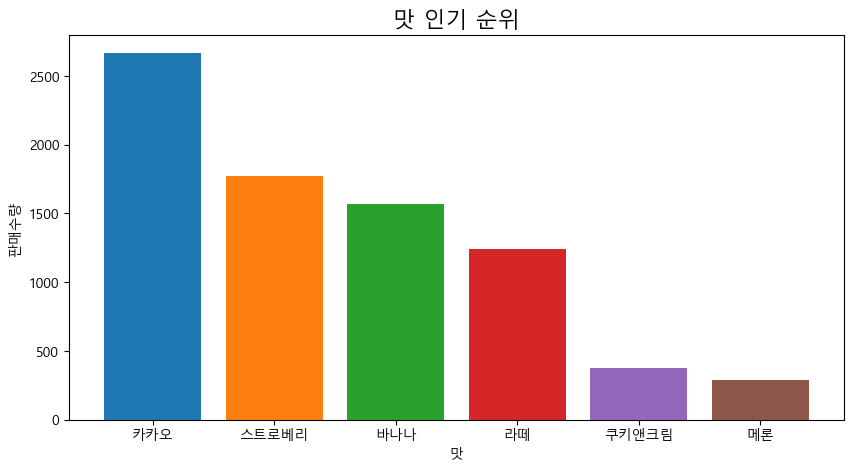

In [31]:
# df_flavor 기준으로 단어와 빈도 리스트 만들기
words_only = df_flavor["단어"].tolist()
counts_only = df_flavor["빈도"].tolist()

plt.figure(figsize=(10, 5))

# 막대그래프, 각 막대별 다른 색상
plt.bar(words_only, counts_only, color=plt.cm.tab10.colors[:len(words_only)])

plt.title('맛 인기 순위', fontsize=16)
plt.xlabel('맛')
plt.ylabel('판매수량')
plt.show()


In [ ]:
🔹 인사이트(Insight)
카카오, 스트로베리, 바나나 → 핵심 베스트셀러, 전체 판매량 70% 이상 차지
라떼 → 중간 인기, 성장 가능성 있음
쿠키앤크림, 메론 → 판매량 낮음, 마케팅 투자 효율 낮음 → 타겟 맞춤 전략 필요
전략(Strategy): "카카오/스트로베리 + 라떼 세트" 패키지 구성

In [34]:
# 긍정/부정 단어 정의 (리뷰 데이터 기반)
pos_keywords = ['좋아요', '만족', '추천', '최고', '맛있', '존맛', '행복', '편해', '저렴']
neg_keywords = ['아쉽', '실망', '불편', '부족', '비싼', '부실', '설사', '파손']

pos_score = 0
neg_score = 0

for review in review_list_a : # 이전 단계에서 만든 50개 리스트 활용
    for p in pos_keywords:
        if p in review:
            pos_score += 1
            break # 한 문장에 긍정어가 여러 개 있어도 1번만 카운트
    for n in neg_keywords:
        if n in review:
            neg_score += 1
            break

# 만족도 계산 (긍정 리뷰 비율)
satisfaction_rate = (pos_score / len(review_list_a)) * 100

print(f"----- 만족도 분석 결과 -----")
print(f"긍정 리뷰 추정: {pos_score}건")
print(f"부정 리뷰 추정: {neg_score}건")
print(f"최종 제품 만족도: {satisfaction_rate:.1f}%")

----- 만족도 분석 결과 -----
긍정 리뷰 추정: 2741건
부정 리뷰 추정: 55건
최종 제품 만족도: 53.9%


In [ ]:
#(긍정/부정 리뷰 비율) (전체 리뷰 5074건 기준)
#긍정: 2741/5074*100 =53.9%
#부정 55/5074*100=1.8%
#중립/무응답 리뷰: 약 44.3%
#만족도 점수화 (0~100)
#단순화: 만족도 점수 = 긍정 리뷰 비율 × 100

#추천 시각화 기준
#0~50점: 낮음
#50~70점: 보통
#70~85점: 높음
#85~100점: 매우 높음


In [ ]:

# 만족도가 보통 수준이므로 전략은 크게 세 가지로 잡을 수 있습니다.

# (1) 긍정 리뷰 확대

# 리뷰 하이라이트 활용

# 긍정 리뷰에서 상위 키워드 추출 후 마케팅 활용

# 예: “다이어트, 초코우유, 아침식사, 영양성분” 강조

# SNS, 홈페이지, 광고, 제품 상세페이지에 리뷰 발췌

# USP 강조

# 제품 강점을 중심으로 메시지 전달 → “건강하게 즐기는 아침식사용 초코우유”


# (2) 부정 리뷰 최소화

# 부정 리뷰 원인 분석

# 1.8% 비율이지만 개선 가능 포인트 확인

# 예: “가격이 비싸다, 용량 부족”

# 개선 및 소통

# 가격/용량 조정, 패키징 개선

# 부정 리뷰 고객 대응 → 신뢰 회복

# KPI 설정

# 목표: 긍정 리뷰 비율 70% 이상
# 전략별 KPI 예시:
# 리뷰 작성율 20% 증가
# 중립 리뷰 50%를 긍정 리뷰로 전환
# 긍정 단어 언급 비율 30% 증가

# “긍정 리뷰 강조 + 중립 리뷰 전환 + 부정 리뷰 최소화 → 만족도 53.9% → 70% 목표”

# 경쟁사 최근 2주 리뷰 누적 수량 (리뷰증가 판매량 증가) 수량만 파악할려고했으나 막힘 상위 5개 사이트 각각  직접 수집하자



In [ ]:
네이버 검색키워드 검색량 조회 SURF 사이트

In [37]:
chromedriver_autoinstaller.install(cwd=True)
driver = webdriver.Chrome()   
driver.get('https://surffing.net/keyword/%ED%94%84%EB%A1%9C%ED%8B%B4%EB%8B%A8%EB%B0%B1%EC%A7%88%EC%9D%8C%EB%A3%8C')
time.sleep(2)    # 2초간 정지


selector = '#keywordResults'
title_top = driver.find_elements(By.CSS_SELECTOR, selector)
# len(title_top)

title_list = []

for a in title_top:
    title = a.text
    title_list.append(title)
    # print(title)

print(len(title_list))
title_list

import pandas as pd

raw_text = title_list[0]
lines = raw_text.split('\n')

columns = ['키워드', '총검색량', 'PC', '모바일']
data = []

i = 1  # 첫 줄은 '키워드 총 검색량 PC 모바일'이므로 건너뛰기
while i < len(lines) - 1:  # 마지막 줄까지
    keyword = lines[i].strip()
    numbers_line = lines[i+1].strip()
    
    # 숫자만 있는 줄인지 확인
    numbers = numbers_line.split()
    numbers = [num.replace(',', '') for num in numbers]
    
    if len(numbers) == 3:
        total, pc, mobile = map(int, numbers)
        data.append([keyword, total, pc, mobile])
    else:
        print("잘못된 숫자 줄:", numbers_line)
    
    i += 2  # 다음 키워드로 이동

df = pd.DataFrame(data, columns=columns)
print(df)

1
          키워드   총검색량    PC    모바일
0    프로틴단백질음료     80     0     80
1      단백질보충제  31670  4670  27000
2       프로틴음료   6480  1330   5150
3        건강음료   1800   430   1370
4       단백질음료  25680  4380  21300
5       기능성음료    220   100    120
6    식물성단백질음료    350    70    280
7         프로틴  38410  6210  32200
8       고단백음료    440    60    380
9   단백질함량높은음료     10     0     10
10      환자영양식   2260   260   2000
11     식물성단백질   5220   870   4350
12   유당불내증단백질     50    10     40
13      유당불내증  20530  2930  17600
14  분리유청단백질음료     40    10     30
15    유청단백질음료     70    10     60
16        환자식   1490   290   1200
17    단백질음료추천   1980   330   1650
18   식물성프로틴음료     20     0     20
19     프로틴드링크    600   140    460
20    미생물다이어트     10     0     10
21      편의점음료   1330   160   1170
22      프로틴드롭     10     0     10
23      단백질워터    320    50    270


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

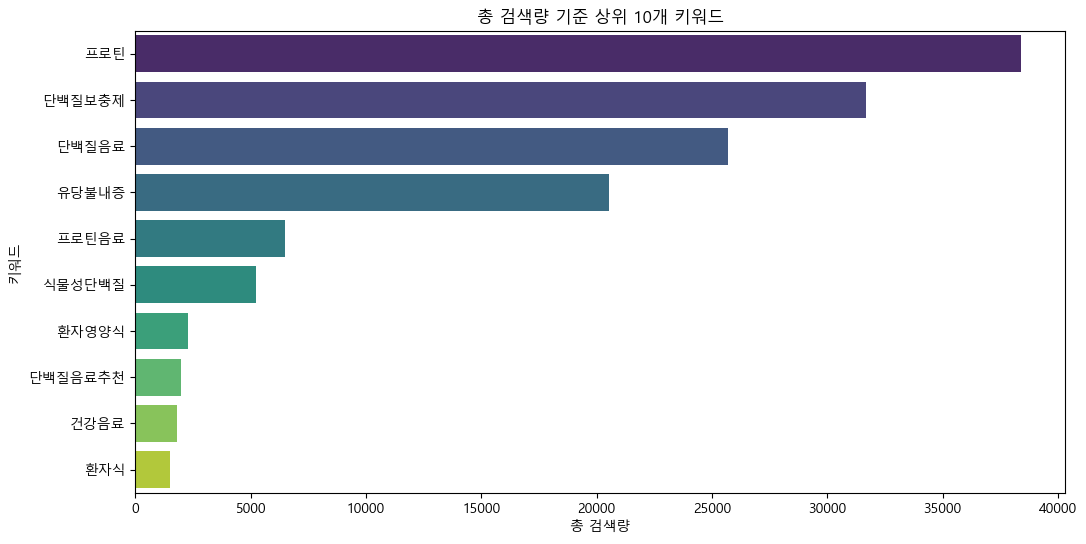

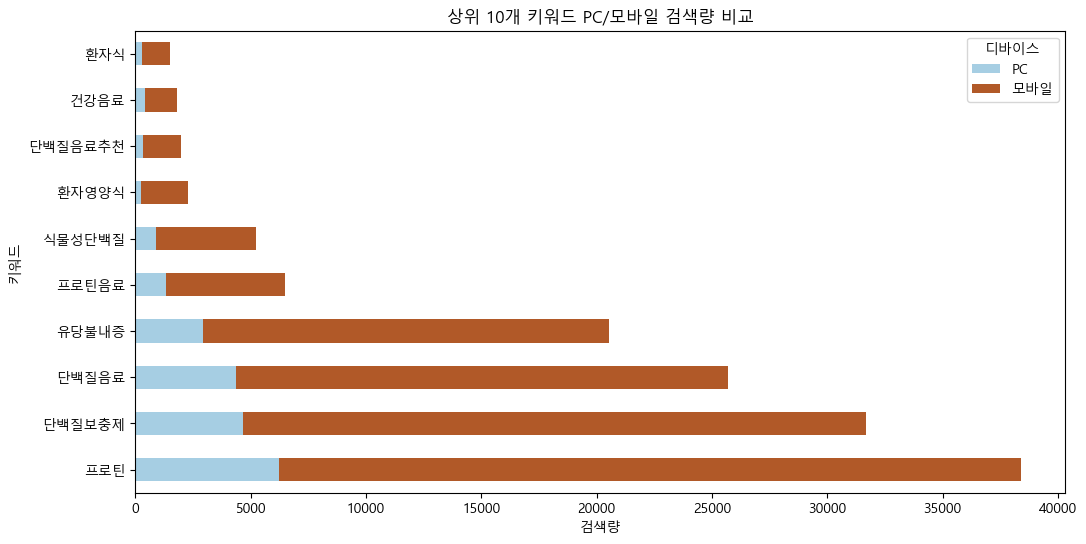

In [66]:
# 한글 폰트 설정 (Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  #마이너스(-) 기호가 □ 로 깨지는 문제 방지

# 1️⃣ 검색량 기준 상위 10개 키워드 시각화  #ascending=False → 내림차순(큰 값부터)  head(10) 상위10개
top_keywords = df.sort_values(by='총검색량', ascending=False).head(10)

#palette='viridis' → 보기 좋은 컬러맵
#data=top_keywords → 상위 10개 데이터 사용
plt.figure(figsize=(12,6))  #가로 12, 세로 6 크기의 캔버스 생성
sns.barplot(x='총검색량', y='키워드', data=top_keywords, palette='viridis')
plt.title("총 검색량 기준 상위 10개 키워드")
plt.xlabel("총 검색량")
plt.ylabel("키워드")
plt.show()

# 2️⃣ PC vs 모바일 비중 비교 (스택형 바)
top_keywords_pc_mobile = top_keywords[['키워드','PC','모바일']].set_index('키워드')

top_keywords_pc_mobile.plot(kind='barh', stacked=True, figsize=(12,6), colormap='Paired')
plt.title("상위 10개 키워드 PC/모바일 검색량 비교")
plt.xlabel("검색량")
plt.ylabel("키워드")
plt.legend(title='디바이스') #legend가 뭐냐면? 👉범례 그래프에서 색깔이나 막대가 무엇을 의미하는지 설명해주는 표
plt.show()
#plt.legend()→ 범례를 보이게 하겠다
#title='디바이스'
#→ 범례 상단에 제목을 붙임
#→ “이 색상 구분은 디바이스 기준이다” 라는 의미

#📌 이 줄이 없으면 색은 있는데 “이게 PC인지 모바일인지” 보는 사람이 헷갈릴 수 있음
#📌 이 줄이 있으면“아, PC / 모바일 검색량 비교구나” 한 번에 이해됨

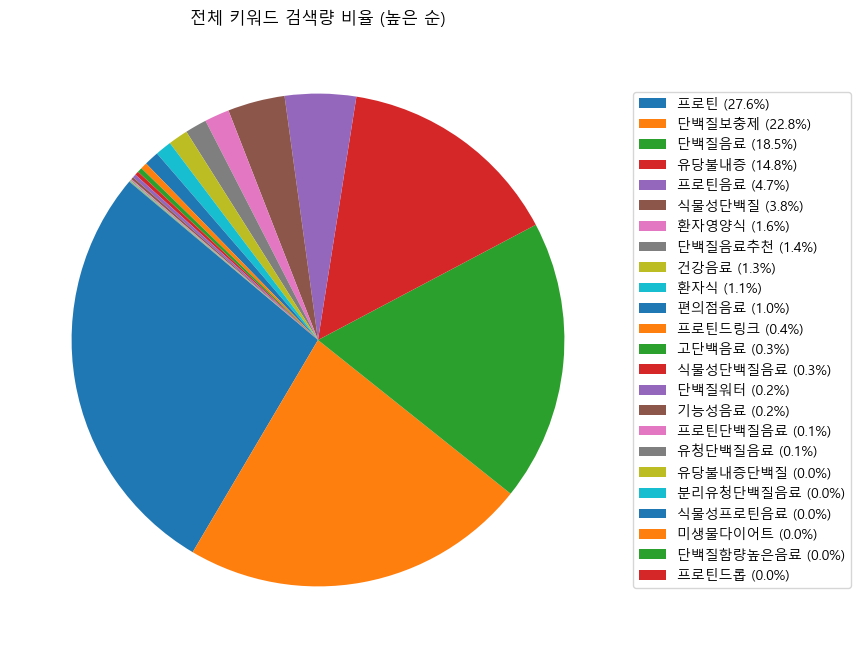

In [74]:
import matplotlib.pyplot as plt

# 1️⃣ 총검색량 기준 내림차순 정렬
# ascending=False→ 내림차순 (큰 값 → 작은 값)
#reset_index(drop=True)기존 인덱스(원래 줄 번호) 제거 파이차트 + 범례를 검색량 큰 순서대로 보여주기 위해서
#0부터 새 인덱스 다시 부여
df_sorted = df.sort_values(by='총검색량', ascending=False).reset_index(drop=True)

sizes = df_sorted['총검색량']  #파이 조각 크기
labels = df_sorted['키워드']   #각 조각이 의미하는 키워드 이름

percent = [f'{p:.1f}%' for p in sizes/sizes.sum()*100]
# 1.sizes.sum() → 전체 검색량 합계
# 2.sizes / sizes.sum() → 각 키워드가 차지하는 비율
# 3. 100 → 퍼센트로 변환
#f'{p:.1f}%' → 소수점 1자리까지 표시

plt.figure(figsize=(8,8))  #파이차트는 정사각형이 가장 안정적 (8,8)은 보고서·PPT에 쓰기 좋은 사이즈

# 라벨 없이 파이
plt.pie(sizes, labels=None, startangle=140)
# labels=None → 파이 안에 글자 안 넣음 ❗
#startangle=140 → 시작 각도를 살짝 돌려서 시각적으로 균형 잡음 키워드가 많으면 지저분해짐

# 레전드: 비중 높은 순
#f'{l} ({p})' 이게 뭐냐면? 이건 **f-string(포맷 문자열)**이야. l = '단백질보충제' p = '48.7%'
#zip(labels, percent) 키워드 + 비율을 한 쌍으로 묶음
#zip(labels, percent) 는 뭐야?
#labels = ['단백질보충제', '프로틴음료', '단백질쉐이크']
#percent = ['48.7%', '21.3%', '10.2%']

plt.legend([f'{l} ({p})' for l,p in zip(labels, percent)],
           loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("전체 키워드 검색량 비율 (높은 순)")

plt.show()


In [ ]:
핵심 인사이트

총검색량 높은 키워드 → 광고, 콘텐츠 중심

모바일 중심 키워드 → SNS/모바일 최적화

특화 키워드(니치 키워드) → 리뷰, 프로모션 활용

상위 키워드 10~15개 집중 + 롱테일 키워드 소규모 공략 → 매출 극대화




광고 전략

검색광고(네이버, 구글)

상위 키워드: CPC 경쟁이 높지만 전환율도 높음

전략: 총검색량 상위 5~10개 키워드 중심




1️⃣ 키워드 기반 전략

검색량 상위 키워드 활용

총검색량이 높은 키워드를 광고/콘텐츠 중심으로 활용

예: "프로틴", "단백질보충제", "단백질음료"

전략:

블로그, SNS, 네이버/카카오 광고 캠페인

검색 최적화(SEO) 콘텐츠 제작

랜딩 페이지 키워드 최적화

PC/모바일 비중 활용

PC 검색량이 높은 키워드 → 웹 광고, 블로그/카페 컨텐츠 최적화

모바일 검색량이 높은 키워드 → 인스타, 틱톡, 모바일 배너 광고 집중

예: "유당불내증", "유당불내증단백질" → 모바일 중심 광고

롱테일 키워드 공략

검색량 낮지만 구매 의도가 높은 키워드 집중

예: "단백질음료추천", "식물성프로틴음료"

전략: 소규모 타겟 광고 + 리뷰 콘텐츠 + 인플루언서 마케팅

2️⃣ 경쟁 환경 & 카테고리 전략

관련 카테고리 확대

단백질 음료 외 건강음료, 환자영양식 키워드도 포함

경쟁사가 적고 타겟 확장 가능

차별화 전략

“고단백”, “유당불내증용”, “식물성” 등 특수 타겟 키워드 강조

예: “유당불내증단백질”, “식물성단백질음료” → 니치 마케팅

니치 마케팅(Niche Marketing)”은 마케팅 용어 중 하나로, 전체 시장에서 상대적으로 작고 특화된 고객층을 대상으로 한 전략을 말합니다.